In [10]:
import matplotlib.pyplot as plt
import pandas as pd
import glob
import networkx as nx
plt.rcParams.update({
  "text.usetex": True,
  "font.family": "Arial"
})

plot_save = "plots/rdata/"

In [11]:
# graph = nx.read_edgelist(
#     "rdata/graph.csv", nodetype=int, delimiter=",", create_using=nx.DiGraph
# )
# print(len(graph.nodes))
# print(len(graph.edges))

In [12]:
data = []
for file in glob.glob("rdata/computation*.csv"):
  #print(file)
  data.append(pd.read_csv(file, delimiter=',', ))
data = pd.concat(data)
data = data.reset_index(drop=True)

#display(data.head(5))

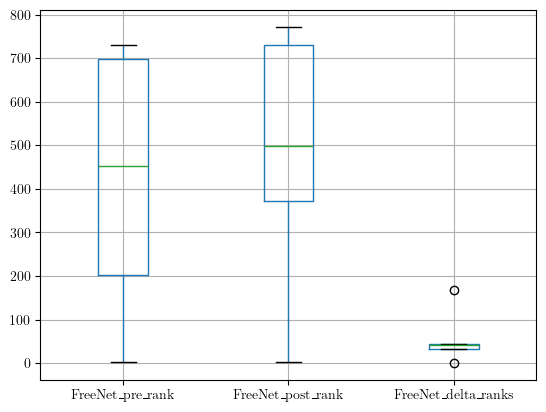

In [13]:
data.boxplot(column=['FreeNet_pre_rank', 'FreeNet_post_rank', 'FreeNet_delta_ranks'])
plt.savefig(fname=plot_save + "freenet_rank.png")
plt.show()

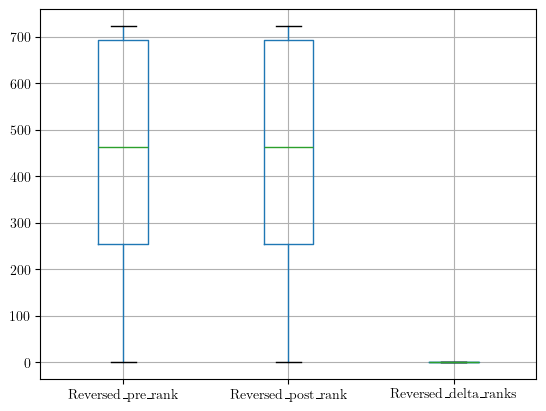

In [14]:
data.boxplot(column=['Reversed_pre_rank', 'Reversed_post_rank', 'Reversed_delta_ranks'])
plt.savefig(fname=plot_save + "reversed_rank.png")
plt.show()


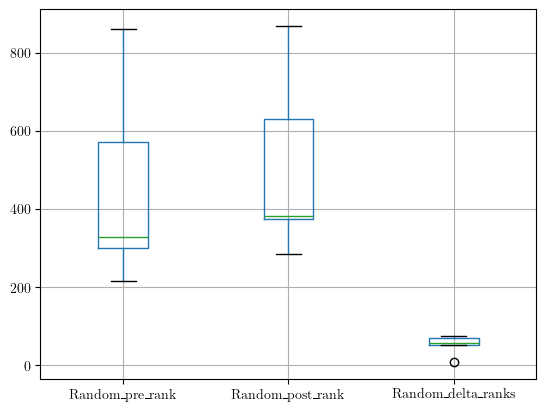

In [15]:
data[data.dist_victim_relayer>=0].boxplot(column=['Random_pre_rank', 'Random_post_rank', 'Random_delta_ranks'])
plt.savefig(fname=plot_save + "random_rank.png")
plt.show()


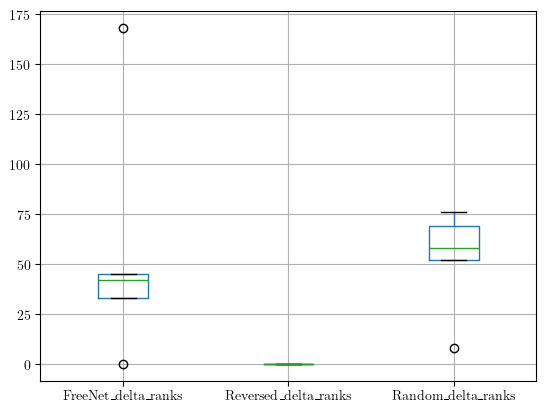

In [16]:
data.boxplot(column=['FreeNet_delta_ranks', 'Reversed_delta_ranks', 'Random_delta_ranks'])
plt.savefig(fname=plot_save + "all_rank.png")
plt.show()

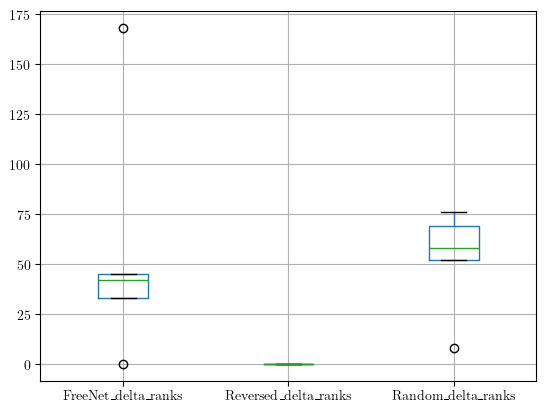

In [17]:
data[data.dist_victim_relayer>=0][data.FreeNet_delta_ranks>=0][data.Reversed_delta_ranks>=0][data.Random_delta_ranks>=0].boxplot(column=['FreeNet_delta_ranks', 'Reversed_delta_ranks', 'Random_delta_ranks'])
plt.savefig(fname=plot_save + "all_positive_rank.png")
plt.show()


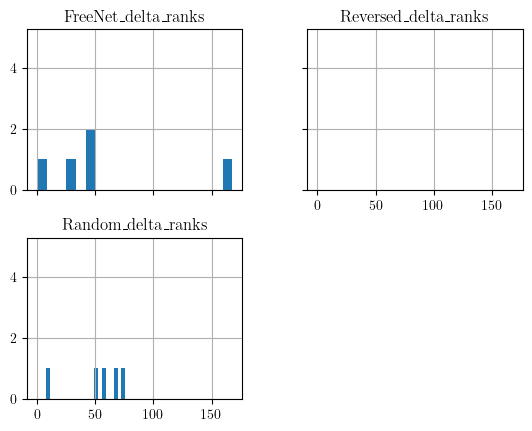

In [18]:
data.hist(column=['FreeNet_delta_ranks', 'Reversed_delta_ranks', 'Random_delta_ranks'], bins=20, sharey=True, sharex=True)
plt.savefig(fname=plot_save + "hist.png")
plt.show()


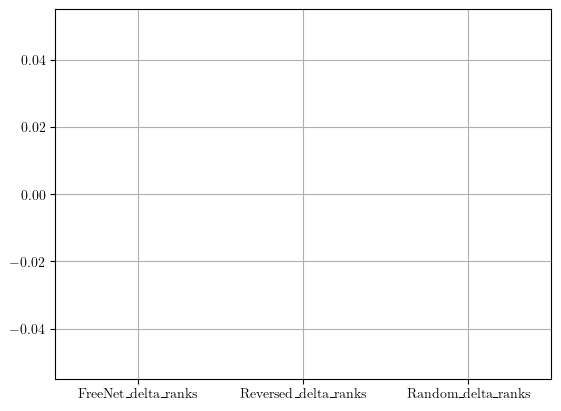

In [19]:
data[data.dist_victim_vilain_pre != data.dist_victim_vilain_post].boxplot(column=['FreeNet_delta_ranks', 'Reversed_delta_ranks', 'Random_delta_ranks'], whis=(1,99))
plt.savefig(fname=plot_save + "different_distance_all.png")
plt.show()

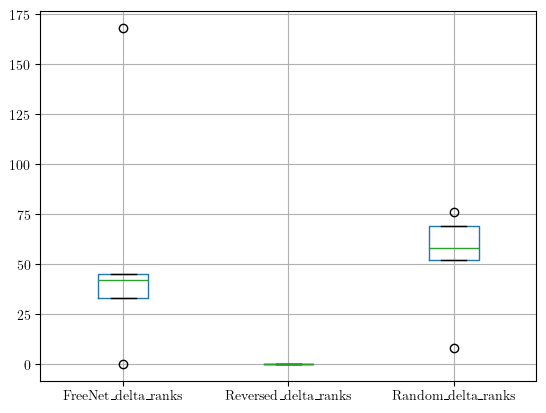

In [20]:
data[data.dist_victim_vilain_pre == data.dist_victim_vilain_post].boxplot(column=['FreeNet_delta_ranks', 'Reversed_delta_ranks', 'Random_delta_ranks'], whis=(1,99))
plt.savefig(fname=plot_save + "same_distance_all.png")
plt.show()